In [1]:
import numpy as np

# Sampling stars from a Plummer sphere
### Formulas
If we consider the **Plummer density** in dimensionless N-body units, then
$$ \rho = \frac{3}{4\pi}\left(1+r^2 \right)^{-5/2} $$
so the 3D cumulative mass is
$$ M(R) = \int_0^{R} {\rm d}r\, 4\pi r^2 \rho = \frac{R^3}{(1+R^2)^{3/2}}$$
which can be inverted to yield the radius $R$ as a function of the enclosed mass $M$
$$ R(M) = \frac{M^{1/3}}{\sqrt{1-M^{2/3}}}; \qquad 0\le M \le 1$$

### Sample N stars through inversion sampling with explicit (closed mathematical form) inversion of the Plummer CDF

In [2]:
# initialise the random number generator
rng = np.random.Generator(np.random.PCG64(seed=12345))

In [3]:
# Sample isotropic 3d vectors with a given modulus
def rand_vec3d( mod ):
    N = len(mod)
    phi = 2*np.pi*rng.random(size=N)
    theta = np.arccos( 2*rng.random(size=N)-1 )
    v3d = np.zeros( (N,3) )
    v3d[:,0] = mod * np.cos( phi ) * np.sin( theta )
    v3d[:,1] = mod * np.sin( phi ) * np.sin( theta )
    v3d[:,2] = mod * np.cos( theta )
    # subtract mean
    for i in range(3):
        v3d[:,i] -= np.mean(v3d[:,i])
    return v3d

In [4]:
# number of stars
N = 1000

# particle mass is 1/N
m = 1/N

# Sampling the mass, draw radii through inversion sampling from the cumulative mass M
U = rng.random(size=N)
rsamp = U**(1/3)/np.sqrt((1-U**(2/3)))

# create N empty 3D vectors
x3d = rand_vec3d( rsamp )

(-10.0, 10.0)

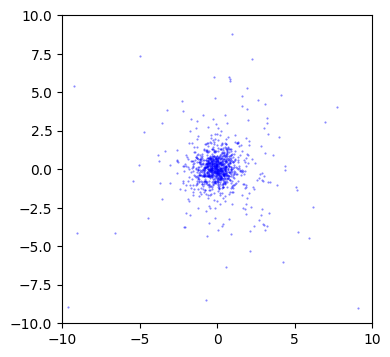

In [5]:
# make a scatter plot of the stars
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x3d[:,0], x3d[:,1], marker='.', s=1, c='b', alpha=0.5)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)